In [20]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module):
    
    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
            nn.InstanceNorm2d(dim),
            nn.ReLU(True)
        ]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
            nn.InstanceNorm2d(dim)
        ]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x)
        return out

In [21]:
class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9):

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
            nn.InstanceNorm2d(ngf),
            nn.ReLU(True)
        ]

        n_downsampling = 2

        for i in range(n_downsampling):
            mult = 2 ** i
            model += [
                nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3, stride=2, padding=1, bias=True),
                nn.InstanceNorm2d(ngf * mult * 2),
                nn.ReLU(True)
            ]

        mult = 2 ** n_downsampling

        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2 ** (n_downsampling - i)
            model += [
                nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2), kernel_size=3, stride=2, padding=1, bias=True),
                nn.InstanceNorm2d(int(ngf * mult / 2)),
                nn.ReLU(True)
            ]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        return self.model(input)

In [22]:
netG = ResNetGenerator()

In [23]:
model_path = "../data/p1ch2/horse2zebra_0.4.0.pth"  # 存有預訓練模型參數的pth檔案位置

model_data = torch.load(model_path)

netG.load_state_dict(model_data)


<All keys matched successfully>

In [24]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [25]:
from PIL import Image
from torchvision import transforms

# 定義預處理函式
preprocess = transforms.Compose([
	transforms.Resize(256),
	transforms.ToTensor()
])


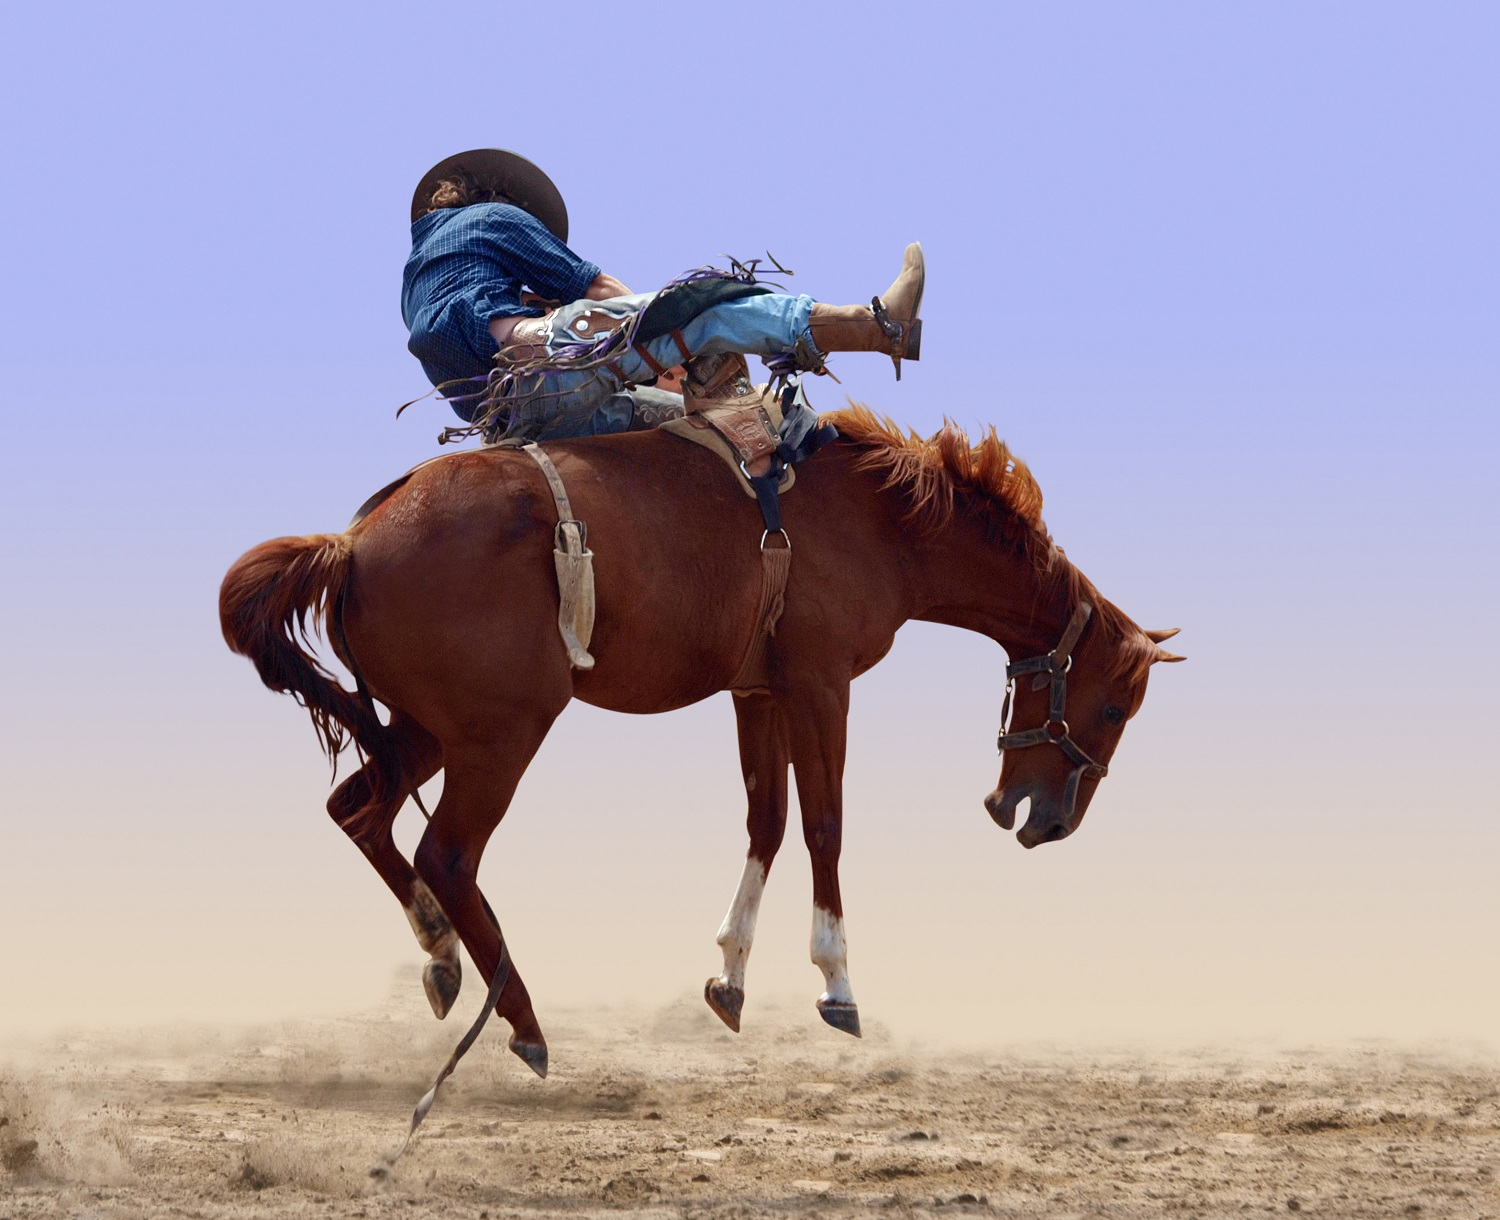

In [26]:
img = Image.open("../data/p1ch2/horse.jpg")

img


In [27]:
img_t = preprocess(img)  # 預處理圖片

batch_t = torch.unsqueeze(img_t, 0)  # 在第0階加入一個批次軸，代表輸入圖片數量


In [28]:
batch_out = netG(batch_t)

batch_out


tensor([[[[ 0.3498,  0.3414,  0.3507,  ...,  0.5176,  0.5196,  0.5236],
          [ 0.3846,  0.3599,  0.2974,  ...,  0.4689,  0.5085,  0.5231],
          [ 0.3402,  0.3555,  0.3409,  ...,  0.4452,  0.4940,  0.5231],
          ...,
          [ 0.0816, -0.0175,  0.1130,  ...,  0.3793,  0.3647,  0.3462],
          [ 0.1846,  0.0812,  0.2148,  ...,  0.3859,  0.3311,  0.3712],
          [ 0.3118,  0.3143,  0.3020,  ...,  0.3742,  0.3674,  0.3602]],

         [[ 0.2523,  0.2099,  0.2587,  ...,  0.4189,  0.4223,  0.4298],
          [ 0.2050,  0.2132,  0.2022,  ...,  0.3625,  0.4317,  0.4639],
          [ 0.2266,  0.2210,  0.2116,  ...,  0.3644,  0.4038,  0.4425],
          ...,
          [ 0.0651, -0.0876,  0.0813,  ...,  0.2800,  0.2732,  0.2748],
          [ 0.0869, -0.0081,  0.0681,  ...,  0.2505,  0.2431,  0.2545],
          [ 0.2731,  0.2131,  0.1669,  ...,  0.2755,  0.2684,  0.2858]],

         [[ 0.4372,  0.4187,  0.4840,  ...,  0.5165,  0.5149,  0.5299],
          [ 0.3624,  0.4187,  

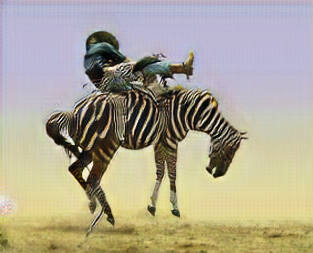

In [29]:
batch_out = torch.squeeze(batch_out, 0)  # 將第0階去除，使batch_out變回3D張量

batch_out = (batch_out + 1.0) / 2.0  # 調整圖片明暗度

out_image = transforms.ToPILImage()(batch_out)  # 轉成圖片

out_image
